We are told that 'V columns may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)'.

Time: Number of seconds elapsed between this transaction and the first transaction in the dataset

Amount: Transaction amount

Class: 1 for fraudulent transactions, 0 otherwise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.shape

(284807, 31)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Fraud Count: 492
Non-Fraud Count: 284315
Fraud: 0.173%
Non-Fraud: 99.827%


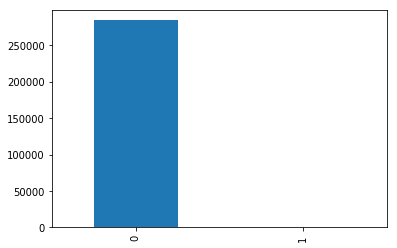

In [7]:
print('Fraud Count: {}\nNon-Fraud Count: {}'.format(df['Class'].value_counts()[1], df['Class'].value_counts()[0]))
print('Fraud: {:.3%}\nNon-Fraud: {:.3%}'.format(df['Class'].value_counts()[1] / len(df), 
                                                df['Class'].value_counts()[0] / len(df)))

df['Class'].value_counts().plot(kind='bar')

Let's look at the distribution of Amount and Time to determine how skewed these features are.

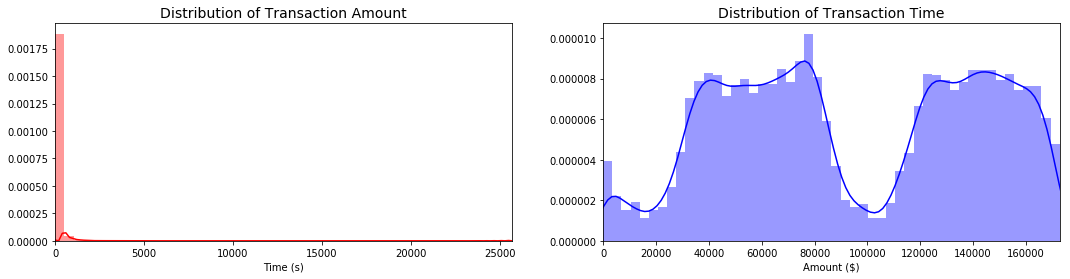

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set_xlabel('Time (s)')

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
ax[1].set_xlabel('Amount ($)')



plt.show()

### Scaling & Distribution
Note how each feature of our dataset is spread differently (ie not every feature is between [0, 10]).

In order to not have any bias, we should scale Time and Amount.

- StandardScaler will transform the data such that its distribution will have a mean value of 0 and standard deviation of 1. (ie the mean is subtracted and then divided by the standard deviation)
- RobustScaler removes the median and scales based on IQR (which makes it less prone to outliers).

In [9]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)

### Sub-Sample of Data

Only 0.18% of our data contains fraudulent transactions. In order to have our model properly understand fraudulent and non-fraudulent transactions, we will evenly split our dataset.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

print('No Frauds {:.3%}'.format(df['Class'].value_counts()[0] / len(df)))
print('Frauds {:.3%}'.format(df['Class'].value_counts()[1] / len(df)))

X = df.drop('Class', axis=1)
y = df['Class']

sss = KFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print('Train: {}     Test: {}'.format(train_index, test_index))
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('\nLabel Distributions:')
print(train_counts_label / len(original_ytrain))
print(test_counts_label / len(original_ytest))

No Frauds 99.827%
Frauds 0.173%
Train: [ 56962  56963  56964 ... 284804 284805 284806]     Test: [    0     1     2 ... 56959 56960 56961]
Train: [     0      1      2 ... 284804 284805 284806]     Test: [ 56962  56963  56964 ... 113921 113922 113923]
Train: [     0      1      2 ... 284804 284805 284806]     Test: [113924 113925 113926 ... 170882 170883 170884]
Train: [     0      1      2 ... 284804 284805 284806]     Test: [170885 170886 170887 ... 227843 227844 227845]
Train: [     0      1      2 ... 227843 227844 227845]     Test: [227846 227847 227848 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------

Label Distributions:
[0.99816982 0.00183018]
[0.99868331 0.00131669]


#### Random Undersampling

Random Undersampling removes samples from the majority class, with or without replacement. This is a good technique to alleviate imbalanced datasets, however it may increase the variance of the classifier.

In [11]:
# We will make our classes equivalent in order to have a normal distribution of classes.

# First we'll shuffle the data (where frac=1 means 100% of the dataframe will be sampled)
df = df.sample(frac=1)

# Number of fraudulent classes (492 rows)
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle df again
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
215385,-2.318681,-1.502725,1.581007,0.392561,-3.100270,2.391055,1.324257,0.930872,1.486242,-1.981691,...,0.561582,1.238313,0.536962,0.891420,0.029522,0.017566,0.129693,0,9.513449,0.650325
141258,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,-8.099119,...,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,1,-0.307413,-0.005733
191583,1.330247,-1.430869,0.364100,1.634955,-1.202773,1.232937,-1.083431,0.458249,1.630450,-0.022118,...,0.913678,-0.042902,0.733914,-0.316445,-0.600861,0.067215,0.025020,0,3.374555,0.524407
151006,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,-9.462573,-22.187089,...,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1,-0.293440,0.113606
219025,0.114965,0.766762,-0.494132,0.116772,0.868169,-0.477982,0.438496,0.063073,-0.186207,-0.159325,...,-0.706865,0.131405,0.600742,-0.604264,0.262938,0.099145,0.010810,1,-0.244673,0.668159


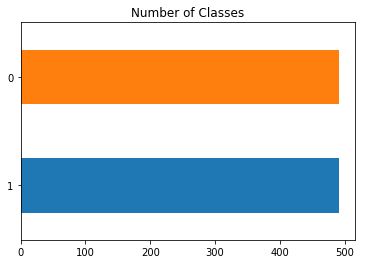

In [12]:
new_df['Class'].value_counts().plot(kind='barh', title='Number of Classes')

We have evenly distributed the subset.

#### Correlation Matrix (Heatmap)

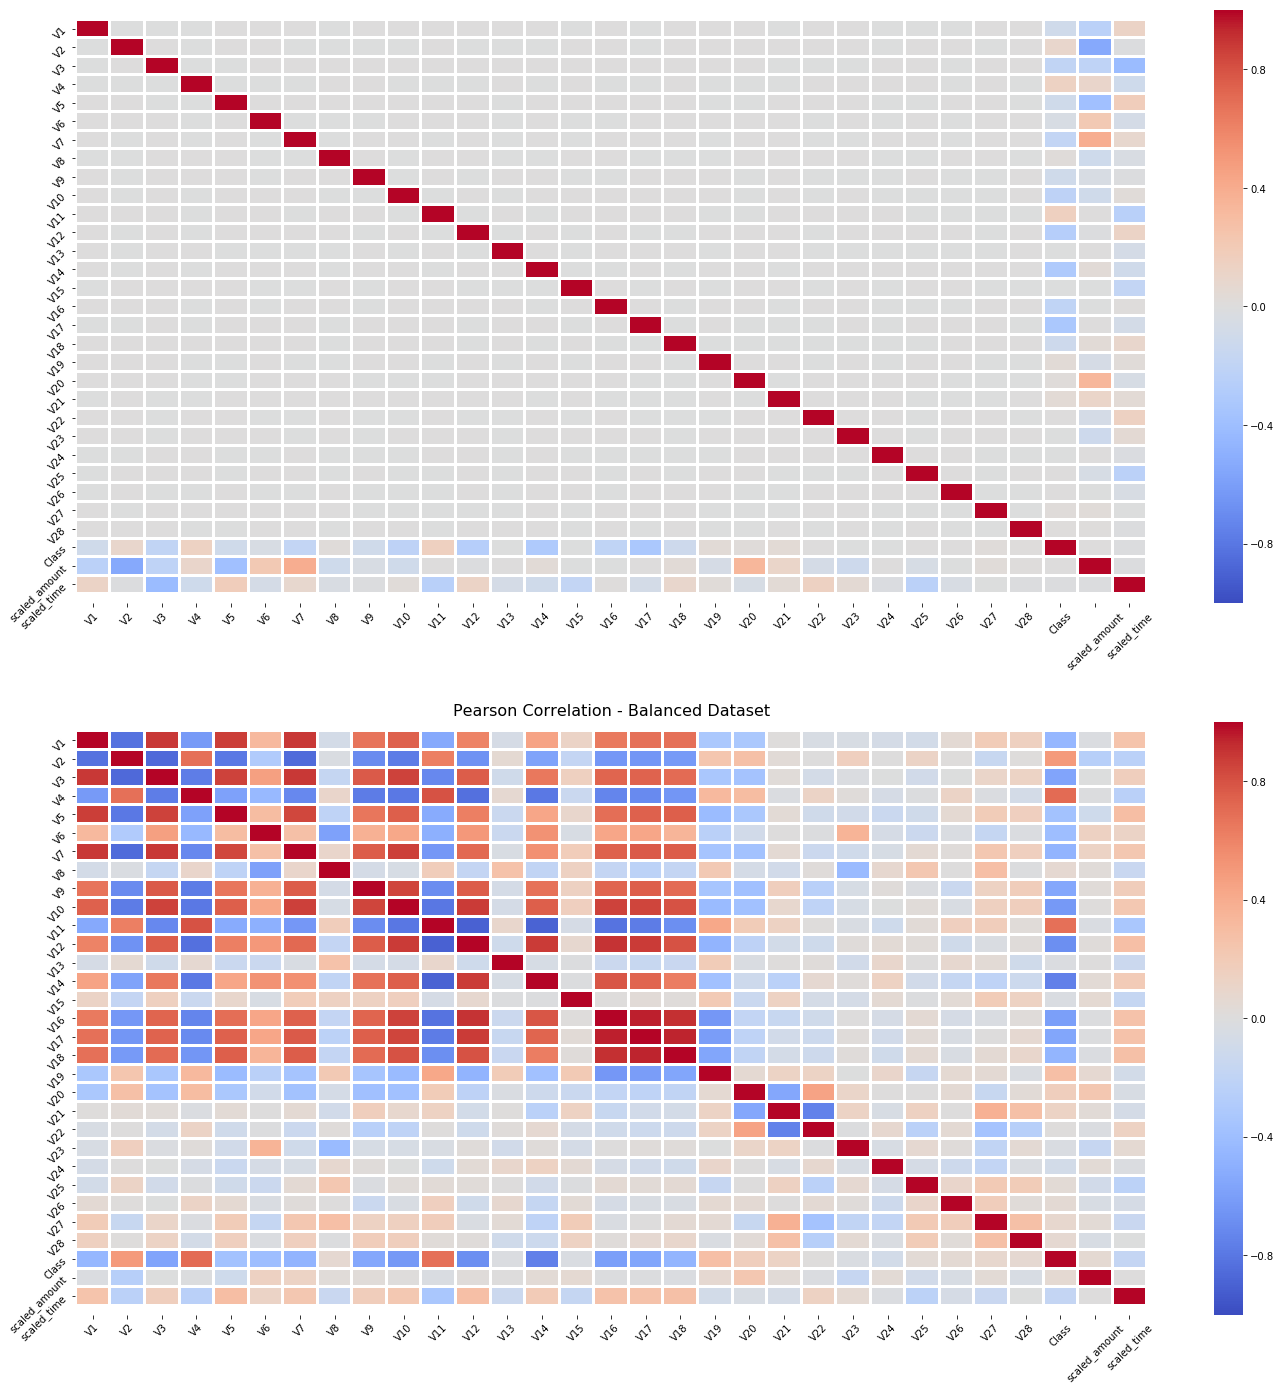

In [13]:
#### Pearson Correlation of Features
dfCorr = df.corr()
new_dfCorr = new_df.corr()


# Original df
fig, ax = plt.subplots(2, 1, figsize=(24, 24))
a = sns.heatmap(dfCorr, cmap='coolwarm',         # Hotter = Positive, Colder = Negative
            annot=False,
            vmin=-1,                             # set the minimum value of the color scale to -1
            linewidths=2,
            linecolor='white',
           ax=ax[0])
bottom, top = a.get_ylim()
a.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Pearson Correlation - Imbalanced Dataset", size=16)
a.tick_params(axis='both', which='major', rotation=45, labelsize=10)


# New df
b = sns.heatmap(new_dfCorr, cmap='coolwarm',     # Hotter = Positive, Colder = Negative
            annot=False,
            vmin=-1,                             # set the minimum value of the color scale to -1
            linewidths=2,
            linecolor='white',
           ax=ax[1])
bottom, top = b.get_ylim()
b.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Pearson Correlation - Balanced Dataset", size=16)
b.tick_params(axis='both', which='major', rotation=45, labelsize=10)

Notice how the 'Class' row has a few strong correlations. This may indicate fraudulent transactions.

- V4
- V3
- V7
- V9
- V10
- V11
- V12
- V14
- V16
- V17

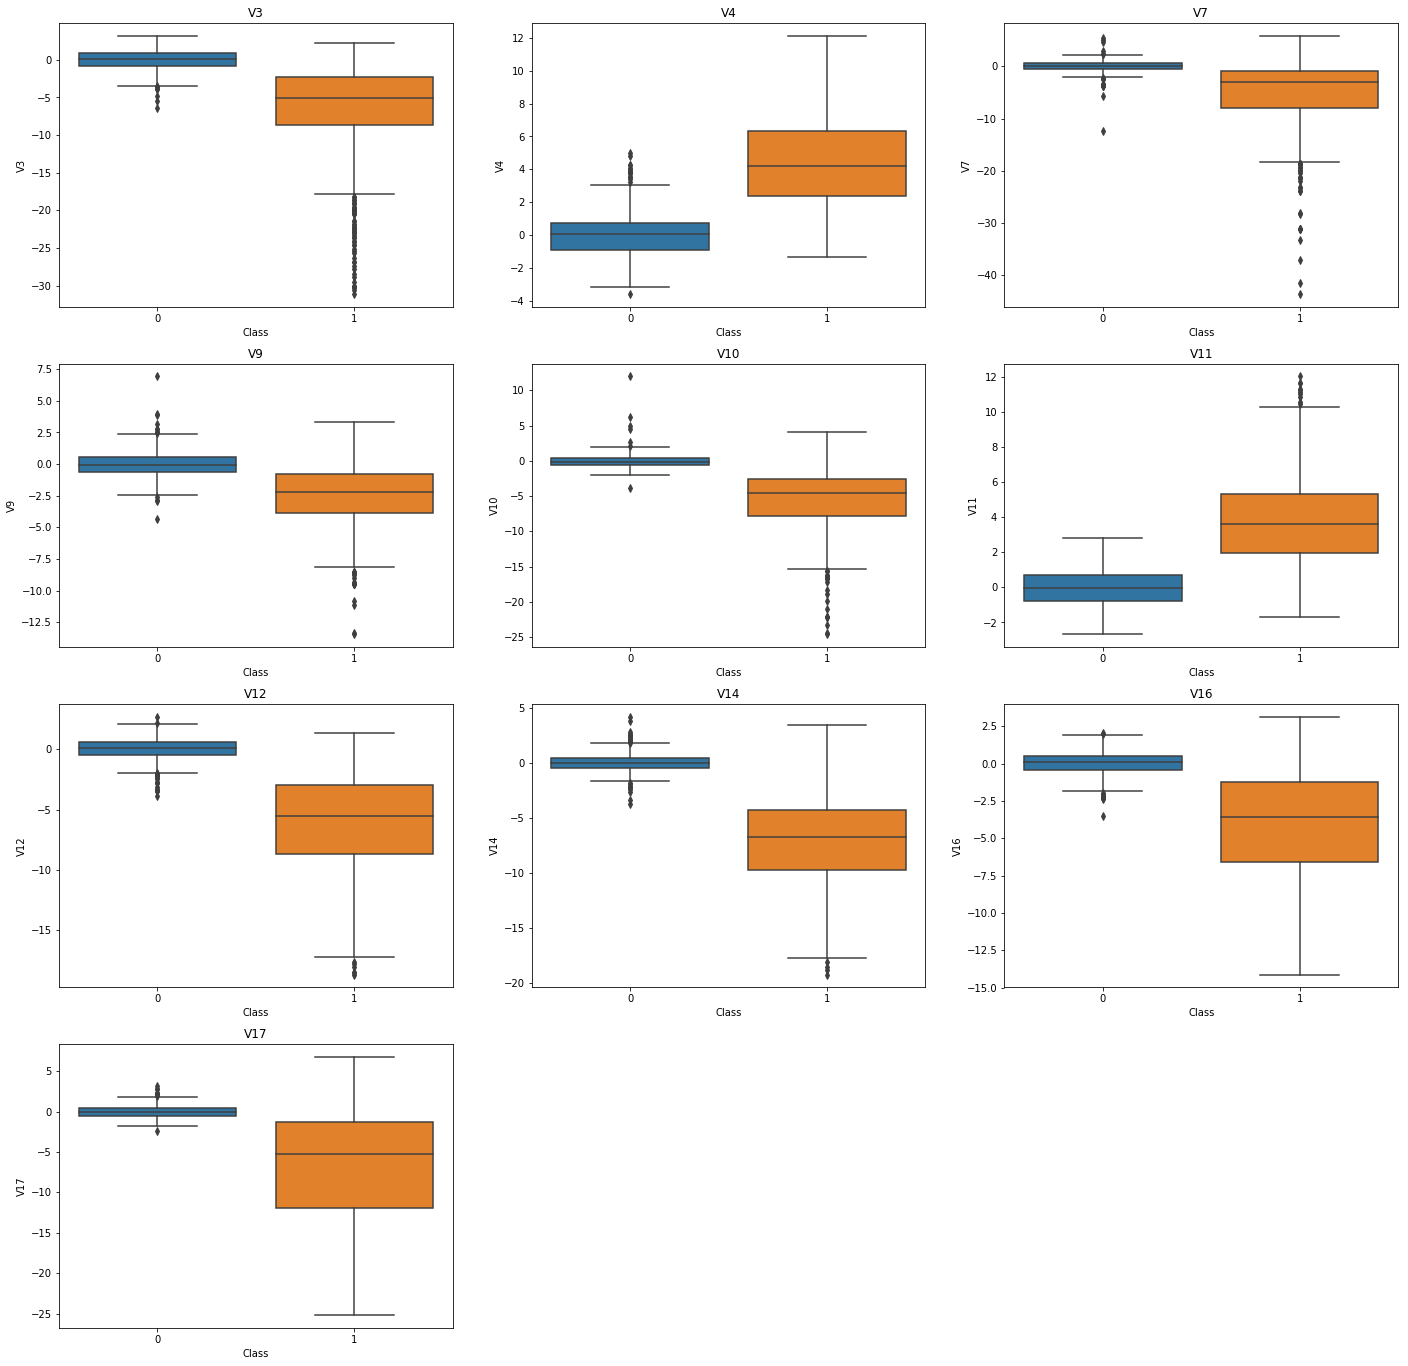

In [14]:
# Box plot of negative correlation classes
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(24,24))

sns.boxplot(x="Class", y="V3", data=new_df, ax=ax[0, 0]).set_title('V3')
sns.boxplot(x="Class", y="V4", data=new_df, ax=ax[0, 1]).set_title('V4')
sns.boxplot(x="Class", y="V7", data=new_df, ax=ax[0, 2]).set_title('V7')
sns.boxplot(x="Class", y="V9", data=new_df, ax=ax[1, 0]).set_title('V9')
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax[1, 1]).set_title('V10')
sns.boxplot(x="Class", y="V11", data=new_df, ax=ax[1, 2]).set_title('V11')
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax[2, 0]).set_title('V12')
sns.boxplot(x="Class", y="V14", data=new_df, ax=ax[2, 1]).set_title('V14')
sns.boxplot(x="Class", y="V16", data=new_df, ax=ax[2, 2]).set_title('V16')
sns.boxplot(x="Class", y="V17", data=new_df, ax=ax[3, 0]).set_title('V17')
fig.delaxes(ax[3, 1])
fig.delaxes(ax[3, 2])

The goal now is to remove outliers from these boxplots. Maybe not all outliers, but at the very least the extreme outliers. This will allow our model to be more accurate.

'V14' looks nicely centered and will have a normal distribution. 'V12' and 'V10' seem to look like they will have some imbalances.

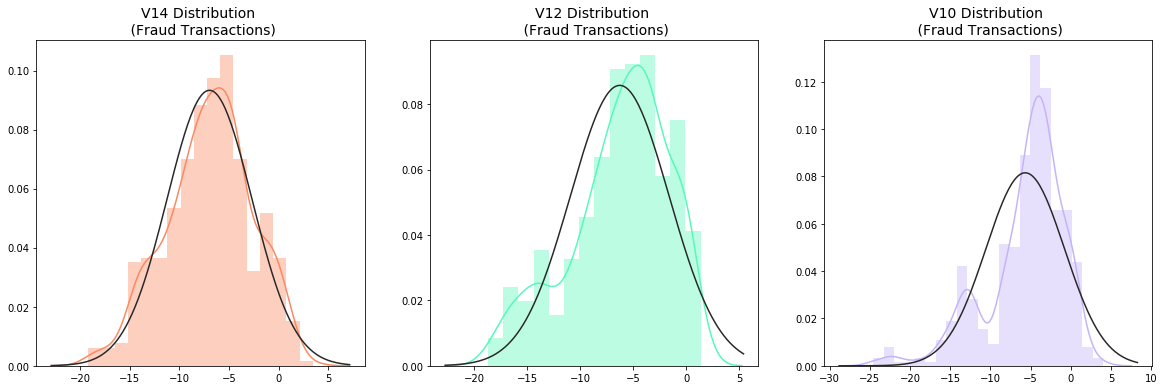

In [15]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist, ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist, ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

#### Removing Outliers

In [16]:
# V14
# Apply standard IQR of 1.5

v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {:.3f}\nQuartile 75: {:.3f}'.format(q25, q75))
v14_iqr = q75 - q25
print('IQR: {:.3f}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('\nCut off: {:.3f}\nLower Bound: {:.3f}\nUpper Bound:{:.3f}'.format(v14_cut_off, v14_lower, v14_upper))

# new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 10)

Quartile 25: -9.693
Quartile 75: -4.283
IQR: 5.410

Cut off: 8.115
Lower Bound: -17.808
Upper Bound:3.832
----------------------------------------


## Dimensionality Reduction

t-SNE is great for highly clustered data.

PCA and SVD are both very similar. They both revolve around computing the orthogonal transformation that decorrelates the variables and keeps the ones with the largest variance.

In [17]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# t-SNE
from sklearn.manifold import TSNE

X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

# PCA
from sklearn.decomposition import PCA

X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)

# Truncated SVD 
from sklearn.decomposition import TruncatedSVD

X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)

In [18]:
X_reduced_tsne[:3]

array([[ -7.93388  ,  -3.8671873],
       [-46.73876  , -11.63238  ],
       [ 10.563363 ,   2.1528625]], dtype=float32)

In [19]:
X_reduced_pca[:3]

array([[-9.0604261 ,  0.90418233],
       [14.50093913, -8.43246418],
       [-9.53962349,  0.67194163]])

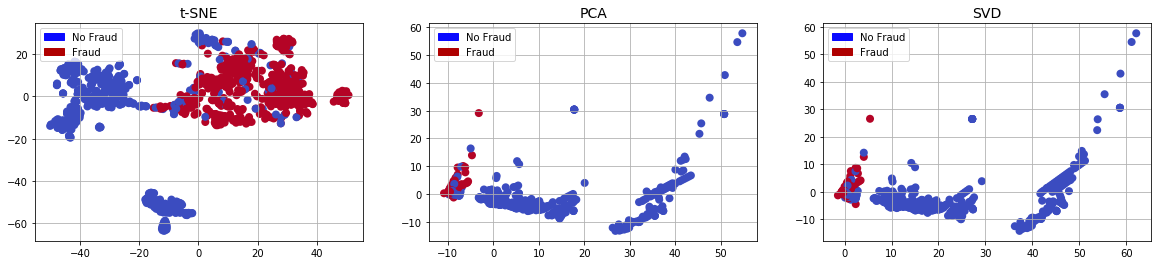

In [20]:
import matplotlib.patches as mpatches

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

# t-SNE
ax[0].scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=(y==0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax[0].set_title('t-SNE', fontsize=14)
ax[0].grid(True)
ax[0].legend(handles=[blue_patch, red_patch])

# PCA
ax[1].scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=(y==0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax[1].set_title('PCA', fontsize=14)
ax[1].grid(True)
ax[1].legend(handles=[blue_patch, red_patch])

# SVD
ax[2].scatter(X_reduced_svd[:, 0], X_reduced_svd[:, 1], c=(y==0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax[2].set_title('SVD', fontsize=14)
ax[2].grid(True)
ax[2].legend(handles=[blue_patch, red_patch])

Notice how PCA and SVD yield very similar results. This is due to the fact that PCA and SVD both revolve around orthogonal transformations.

### Model

In [21]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Turn the values into arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [22]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

classifiers = {
    'LogisticRegression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'SVC' : SVC(),
    'DecisionTree' : DecisionTreeClassifier()
}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    trainingScore = cross_val_score(classifier, X_train, y_train, cv=5)
    print('{}\nTraining Score: {:.3%}\n'.format(key, trainingScore.mean()))

LogisticRegression
Training Score: 94.535%

KNN
Training Score: 94.534%

SVC
Training Score: 93.777%

DecisionTree
Training Score: 93.265%



##### GridSearchCV - Optimal Parameters

In [23]:
from sklearn.model_selection import GridSearchCV

# [LogisticRegression Parameters]
log_reg_params = {'penalty' : ['l1', 'l2'],
                  'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# LR best parameters
log_reg = grid_log_reg.best_estimator_ 


# [KNN Parameters]
knears_params = {'n_neighbors': list(range(2,5,1)), 
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNN best parameters
knears_neighbors = grid_knears.best_estimator_



# [SVC Parameters]
svc_params = {'C': [0.5, 0.7, 0.9, 1], 
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best parameters
svc = grid_svc.best_estimator_



# [DecisionTree Parameters]
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# DT best parameters
tree_clf = grid_tree.best_estimator_

In [24]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: {:.3%}'.format(log_reg_score.mean()))


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score: {:.3%}'.format(knears_score.mean()))

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score: {:.3%}'.format(svc_score.mean()))

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score: {:.3%}'.format(tree_score.mean()))

Logistic Regression Cross Validation Score: 95.043%
Knears Neighbors Cross Validation Score: 94.788%
Support Vector Classifier Cross Validation Score: 95.678%
DecisionTree Classifier Cross Validation Score: 93.772%


### Learning Curves:

- The wider the gap between the training score and the cross validation score, the more likely your model is overfitting (high variance).
- If the score is low in both training and cross-validation sets this is an indication that our model is underfitting (high bias)
- Logistic Regression Classifier shows the best score in both training and cross-validating sets.


##### Random Undersampling

- Randomly remove samples from the majority class, with or without replacement. This is one of the earliest techniques used to alleviate imbalance in the dataset, however, it may increase the variance of the classifier and may potentially discard useful or important samples.

In [25]:
from imblearn.under_sampling import NearMiss

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from collections import Counter

from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

# We will undersample during cross validating
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

# Gather data from our KFold cross-validator
for train_index, test_index in sss.split(undersample_X, undersample_y):
#     print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
    
# Set undersampled data to arrays
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

# Define metrics arrays
undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

# Cross Validating the right way
for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

ModuleNotFoundError: No module named 'imblearn'

In [33]:
# Logistic Regression Learning Curves

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(0.1, 1.0, 5)):
    
    # Plot all 4 estimators
    fig, ax = plt.subplots(2, 2, figsize=(20, 14), sharey=True)
    
    if ylim is not None:
        plt.ylim(*ylim) 
        
    
    # Estimator 1
    train_sizes, train_scores, test_scores = learning_curve(estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    ax[0, 0].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean,
                   train_scores_mean + train_scores_std, alpha=0.1, color="#FF9124")
    
    ax[0, 0].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean,
                   test_scores_mean + test_scores_std, alpha=0.1, color="#2492FF")
    
    ax[0, 0].plot(train_sizes, train_scores_mean, 'o-', color='#FF9124')
    ax[0, 0].plot(train_sizes, test_scores_mean, 'o-', color='#24292FF')
    ax[0, 0].set_title("Logistic Regression Learning Curve", fontsize=14)
    ax[0, 0].set_xlabel('Training size (m)')
    ax[0, 0].set_ylabel('Score')
    ax[0, 0].grid(True)
    ax[0, 0].legend(loc="best")
    
    
    # Estimator 2
    train_sizes, train_scores, test_scores = learning_curve(estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    ax[0, 1].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean,
                   train_scores_mean + train_scores_std, alpha=0.1, color="#FF9124")
    
    ax[0, 1].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean,
                   test_scores_mean + test_scores_std, alpha=0.1, color="#2492FF")
    
    ax[0, 1].plot(train_sizes, train_scores_mean, 'o-', color='#FF9124')
    ax[0, 1].plot(train_sizes, test_scores_mean, 'o-', color='#24292FF')
    ax[0, 1].set_title("KNN Learning Curve", fontsize=14)
    ax[0, 1].set_xlabel('Training size (m)')
    ax[0, 1].set_ylabel('Score')
    ax[0, 1].grid(True)
    ax[0, 1].legend(loc="best")
    
    
    # Estimator 3
    train_sizes, train_scores, test_scores = learning_curve(estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    ax[1, 0].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean,
                   train_scores_mean + train_scores_std, alpha=0.1, color="#FF9124")
    
    ax[1, 0].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean,
                   test_scores_mean + test_scores_std, alpha=0.1, color="#2492FF")
    
    ax[1, 0].plot(train_sizes, train_scores_mean, 'o-', color='#FF9124')
    ax[1, 0].plot(train_sizes, test_scores_mean, 'o-', color='#24292FF')
    ax[1, 0].set_title("SVM Curve", fontsize=14)
    ax[1, 0].set_xlabel('Training size (m)')
    ax[1, 0].set_ylabel('Score')
    ax[1, 0].grid(True)
    ax[1, 0].legend(loc="best")
    
    
    # Estimator 4
    train_sizes, train_scores, test_scores = learning_curve(estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    ax[1, 1].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean,
                   train_scores_mean + train_scores_std, alpha=0.1, color="#FF9124")
    
    ax[1, 1].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean,
                   test_scores_mean + test_scores_std, alpha=0.1, color="#2492FF")
    
    ax[1, 1].plot(train_sizes, train_scores_mean, 'o-', color='#FF9124')
    ax[1, 1].plot(train_sizes, test_scores_mean, 'o-', color='#24292FF')
    ax[1, 1].set_title("Decision Tree Learning Curve", fontsize=14)
    ax[1, 1].set_xlabel('Training size (m)')
    ax[1, 1].set_ylabel('Score')
    ax[1, 1].grid(True)
    ax[1, 1].legend(loc="best")
    
    

In [27]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

The general behavior we would expect from a learning curve is this:

- A model of a given complexity will __overfit__ a small dataset: this means the training score will be relatively high, while the validation score will be relatively low.

- A model of a given complexity will __underfit__ a large dataset: this means that the
training score will decrease, but the validation score will increase.

- A model will never, except by chance, give a better score to the validation set than
the training set: this means the curves should keep getting closer together but
never cross.

In [ ]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))